### step 0: Importing the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/Cancer_Data(1).csv")

### Step 1: Cleaning the data

In [1]:
df.head(5)

NameError: name 'df' is not defined

In [3]:
# To see some information about our data
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(569, 33)

In [4]:
df = df.drop(columns=['Unnamed: 32'])

In [5]:
df = df.drop(columns=['id'])

In [6]:
# Counting NaN values in all columns
nan_count = df.isna().sum()

print(nan_count.sort_values(ascending=False))
# Now we know we have a lot Nan valuse so we have to fix that

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [7]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

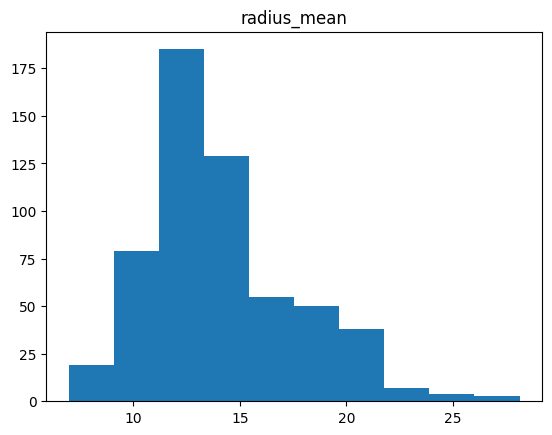

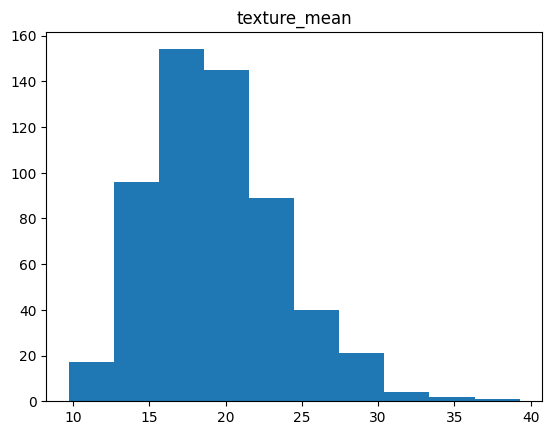

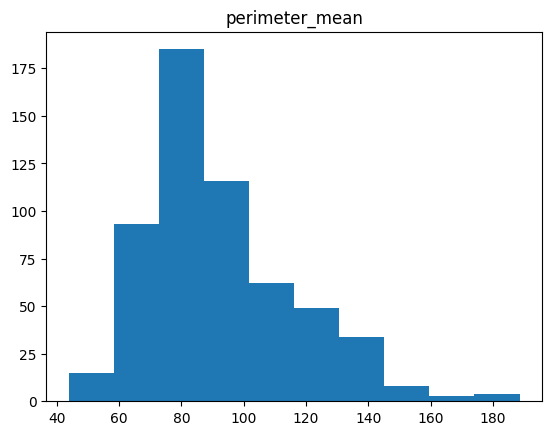

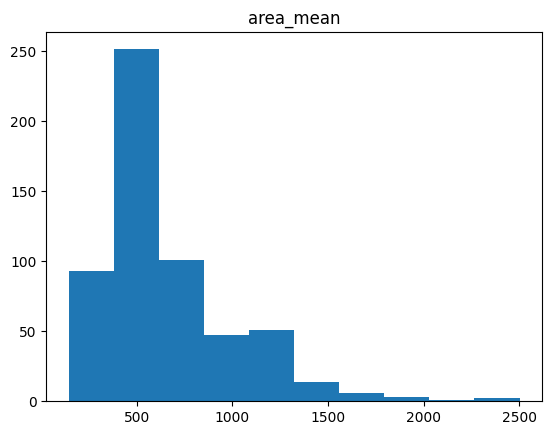

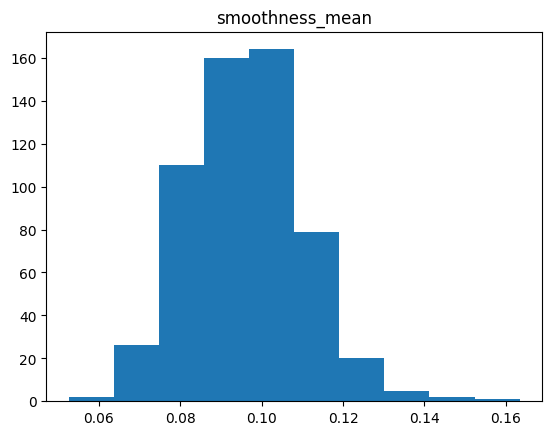

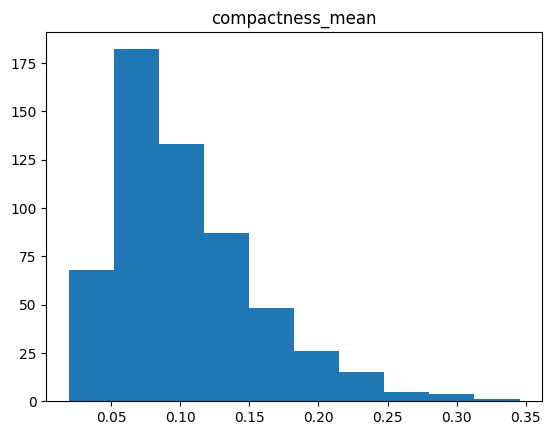

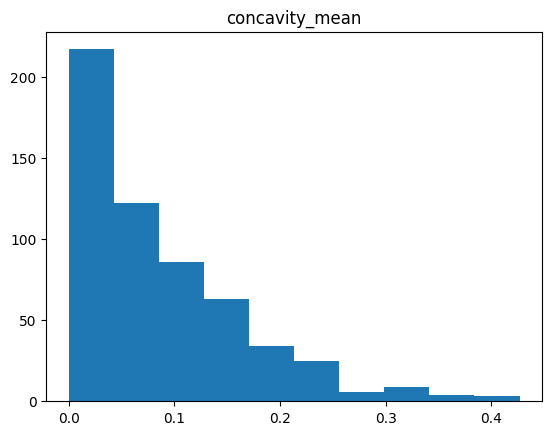

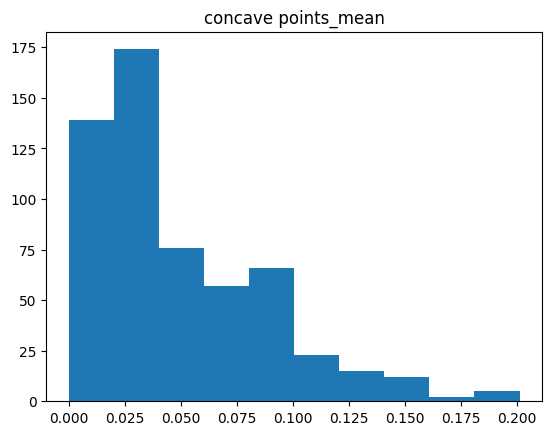

In [8]:
visoal_list = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean"]

# visoalising
for i in visoal_list:
  plt.hist(df[i])
  plt.title(i)
  plt.show()

### Step 2 : Split the data


In [9]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Difreenrnt algorithem

## SVM

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
  }

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [12]:
best_model_of_SVM = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])
best_model_of_SVM.fit(X_train, y_train)


#Evaloatin
y_pred = best_model_of_SVM.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



we use class_weight={0:1, 1:5} to reflect the higher medical cost of missing a cancer case.
this improved recall from 0.91 to 0.97 with acceptable false positives.

In [15]:
class_weights = {0: 1, 1: 5}
best_model_of_SVM = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], class_weight=class_weights, probability=True)
best_model_of_SVM.fit(X_train, y_train)

#Evaloatin
y_pred = best_model_of_SVM.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9298245614035088
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        71
           1       0.87      0.95      0.91        43

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [ ]:
# finding the best weight
for w in range(1, 10):
  class_weights = {0: 1, 1: w}
  best_model_of_SVM = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], class_weight=class_weights, probability=True)
  best_model_of_SVM.fit(X_train, y_train)

  #Evaloatin
  y_pred = best_model_of_SVM.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

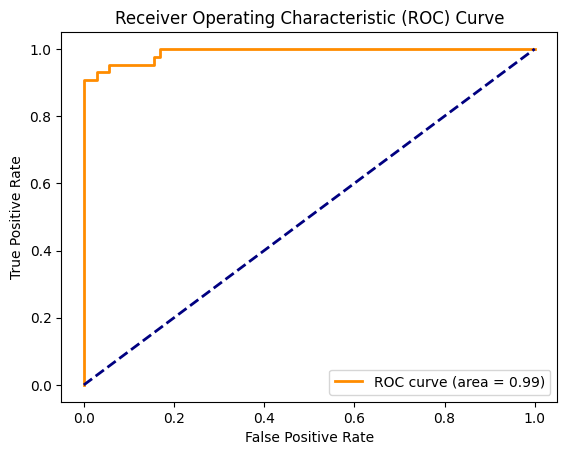

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = best_model_of_SVM.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Add diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()